## Comparing average London temperature conditions over the past 14 years

### Table of Contents

1. [Introduction](#introduction)
2. [Methodology](#methodology)
    1. [Data Sources](#data-sources)
    2. [Data Processing](#data-processing)
3. [Temperatures - Full Comparison](#temperatures---full-comparison)
    1. [Overview](#overview)
    2. [Visualization and Analysis](#visualization-and-analysis)
4. [Temperatures - Year on Year Comparison](#temperatures---year-on-year-comparison)
    1. [Yearly Trends](#yearly-trends)
    2. [Detailed Comparisons](#detailed-comparisons)
5. [Temperatures - Cross-Section Analysis](#temperatures---cross-section-analysis)
    1. [September Analysis](#september-analysis)
    2. [March Analysis](#march-analysis)
6. [Conclusion](#conclusion)
7. [Discussion on Techniques Used](#discussion-on-techniques-used)

---


### **1. Introduction**

Is London getting hotter?

In this analysis, we explore the average temperature changes in London over the past 14 years. We aim to understand the broader trends, seasonal variations, and specific month-to-month changes. The analysis will help to provide insights into how London's climate has evolved and may inform future expectations around building energy consumption during summer and winter months.

This analysis is based on heating and cooling degree days (HDDs, CDDs). These measure the average temperature in a month, and strongly correlate with how much energy will be needed for heating or cooling during that month.

**Project Background**

As an energy analyst in London, I look for ways to predict the energy use of the large plant in the buildings we manage. I'm writing this report to highlight a technique used to measure average temperatures. This will answer the question 'is London getting hotter?', as well as providing insight into a common technique for measuring progress on energy savings.

There is a trend that in hotter months, there will be more demand for A/C, while in winter there will be more demand for chillers. 
This is really important. It means that if there is a month where the A/C used thousands more £ of energy in a month this year, vs the same month last year, we need to know if this was wasted energy, or if it was because it was a hotter month and the building needed more A/C to keep its temperature.

We can't do just by looking at the maximum temperature. Instead, there is a measure which is really good at predicting how much heating or cooling the building will need in specific time period. This is commonly known as a degree day.

**Heating Degree Days (HDD)**

Heating Degree Days are a measure used to estimate the amount of energy needed to heat a building. It is based on the outside air temperature and the assumption that people will start heating their buildings when the temperature drops below a certain threshold, usually 15°C (60°F).

For example, if the average temperature for a day is 10°C, that day would have 5 Heating Degree Days (15°C - 10°C = 5 HDD).
The more Heating Degree Days there are, the more energy is likely needed for heating. This typically correlates with a higher gas use in London office buildings.

**Cooling Degree Days (CDD)**

Cooling Degree Days are a measure used to estimate the amount of energy needed to cool a building. It is based on the outside air temperature and the assumption that people will start cooling their buildings when the temperature rises above a certain threshold. For convenience we also use 15°C.

Here's how it works:

If the outside temperature is above 15°C, the difference between the actual temperature and 15°C is counted as Cooling Degree Days.
For example, if the average temperature for a day is 23°C, that day would have 8 Cooling Degree Days (23°C - 15°C = 8 CDD).
The more Cooling Degree Days there are, the more energy is likely needed for cooling.
These measures are useful for understanding how weather affects energy consumption in buildings. More Heating Degree Days mean colder weather and higher heating needs, while in the summer we expect to have more CDDs, due to hot weather.

### **2. Metholodogy**
**Data Sources**

I downloaded data from https://www.degreedays.net, which uses weather station data to calculate degree days for a given station. I used **weather station 03770**, listed as St James Park, London. This meter has a high accuracy, meaning that its readings are rarely missing and do not need to be estimated. 


Other available weather stations in London tend to be in airports, such as Gatwick and London City. As an extension to this work, someone could compare measurements at other weather meters and compare similarities between the data. We would expect to see identical trends. 


I downloaded data from January 2010 to June 2024, just over 14 years. This data is aggregated to give monthly sums of the HDDs and CDDs recorded. This gives us a good impression of the **average temperature** of the month. This is a convenient time range, although more data going back for twenty or more years is generally available. A futher project could include this data.



**Data Processing**

I used Microsoft Excel to order this data in several tables. I used a **[star schema](https://en.wikipedia.org/wiki/Star_schema)**
, which is a simple way to organise bulk data and information about that data. 
 
 My maine table had meter readings in the format

| Timestamp | Reading | 

for several stations, and for both heating and cooling degree days. 

For example, the column with title 03770H150 contains readings for each month, at station **03770**, calculating **HDDs** using **15.0°C** as the reference temperature. See below the first few entries of this source.

In [34]:
%%capture
## Initialise data from other analysis notebook.
%run data.ipynb


In [35]:
WS_Data.head()

,Timestamp,03770H150,03770C150,EGLLH150,EGLLC150,EGLCH150,EGLCC150,Year
0,2010-01-01,375.7,0.0,397.5,0.0,385.6,0.0,2010
1,2010-02-01,292.9,0.0,307.8,0.0,305.8,0.0,2010
2,2010-03-01,228.5,0.1,246.5,0.3,241.7,0.1,2010
3,2010-04-01,134.7,10.0,147.1,9.7,150.8,7.9,2010
4,2010-05-01,104.7,28.6,114.7,31.5,116.5,23.0,2010


I also used Excel to keep data on the different weather stations and their characteristics. We can see that station 03770 is 98% accurate. I have also input its coordinates, which could facilitate location-based analysis later. See below the entries available.

In [36]:
WS_Stations.head()

,Station ID,Station Name,Station Longitude,Station Latitude,Station City,% Estimated
0,03770,London St James Park,0.13W,51.50N,London,0.020
1,EGLL,"London, GB",0.45W,51.48N,London,0.002
2,EGLC,London City Airport,NaN,NaN,London,0.030


To be thorough, I also made a table which stores data about each individual record in the main Data table. You can see below the name of the record, the station which recorded it, and the reference temperature used.
This makes the project easily scalable, and simple to add future records, at different locations, or with different reference temperatures.

In [37]:
WS_Records.head()

,Record,Station ID,Temperature
0,03770H150,03770,15
1,03770C150,03770,15
2,EGLLH150,EGLL,15
3,EGLLC150,EGLL,15


### **3. Temperatures - Full Comparison**

#### **A. Overview**

In this section, let's start by visualising all of our data. We show the number of heating degree days for each month, from 2010 until June 2024.
This is roughly 170 data points, so we expect quite a compact month. As explained before, these are seasonal, so we expect to see spikes and troughs in our graph, with slight changes depending on how hot or cold the month was, which depends on many factors including rainfall, cloud cover, weather patterns etc.

#### **B. Visualisation and Analysis**

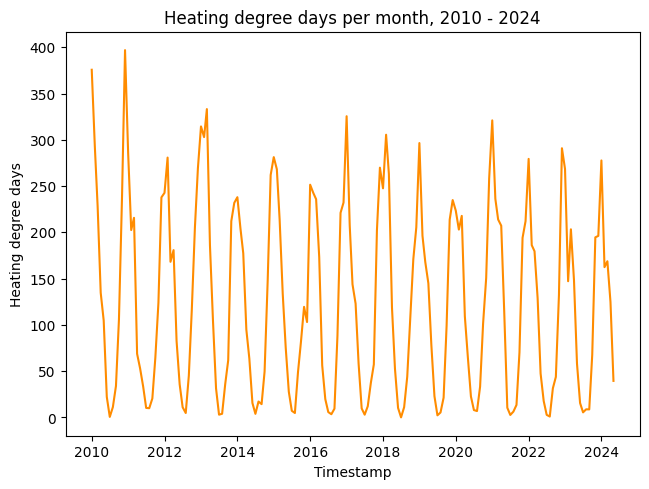

In [38]:
fig1

Here is the full data, showing heating degree days per month. It is clearly seasonal, with random spikes, indicating especially cold periods. For example, 2011 had the coldest month of the past 14 years, and 2020 had a remarkably mild winter. 

### **4. Temperatures - Year on Year Comparison**

#### **A. Overview**

The number of heating degree days in a period reflect how cold that period was. So, by comparing the annual total of heating degree days for this weather station in London, we can find out which years for London have been coldest in the past 14 years. Since the majority of heating degree days happen in the winter, this measure really only tells us which winters were coldest. 

In order to work out which summers felt cold, we should look at cooling degree days. The years with most cooling degree days, required the most AC use, and felt hottest. The years with fewer cooling degree days would have felt like the stereotypical British Summer!

#### **B. Visualisation and Analysis**

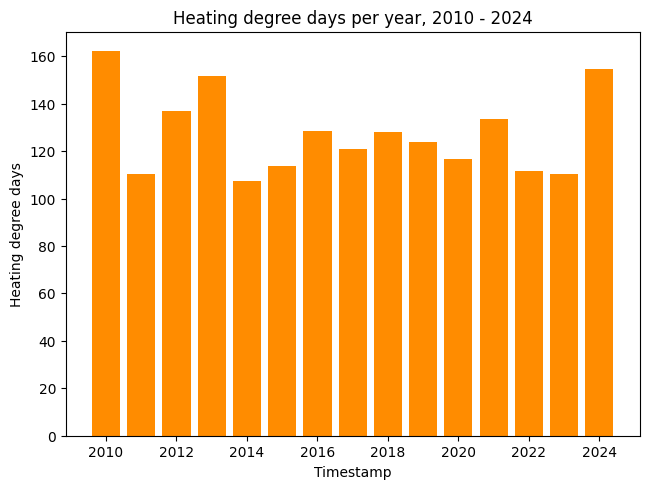

In [39]:
fig3

The graph above shows heating degree days each year. We can see that 2010, and 2024 had the most heating degree days. 

At first glance, this is surprising. We wouldn't expect 2024 to have had many heating degree days yet, since November and December 2024 should contribute lots extra. This means that 2024 is on track to have the coldest London months in the past 14 years. This doesn't quite seem right.

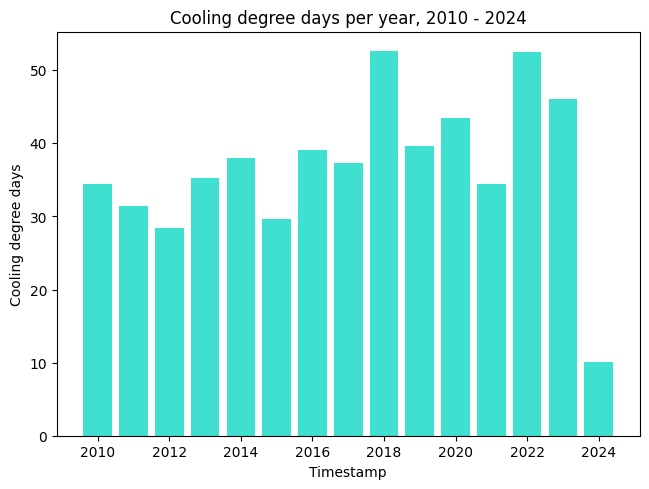

In [40]:
fig4

Looking at cooling degree days tells us when the hottest summers were. We can see that 2018 and 2022 had the hottest London summers, according to this chart. This matches with the data shown in fig2, which shows the monthly breakdown. There, we also see that 2018 and 2022 had the hottest months on record in London. 

Interestingly, the third hottest summer was 2023. While the hottest months in this year were not outstanding (~125 CDDs in July and August), we can see that September was exceptionally hot, hotter than August even. This effectively extended the summer, resulting in a record year when counting all months together. Anecdotally, you might remember the heatwaves that year. It actually caused many engineering issues in the buildings we managed.

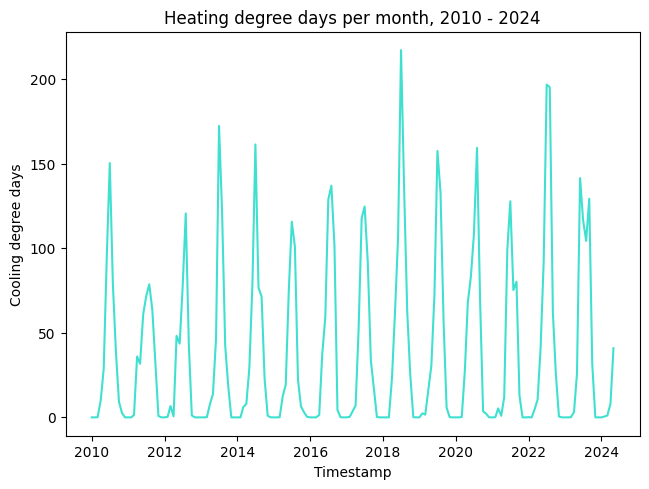

In [41]:
fig2

### **5. Temperatures - Cross-section Analysis**

In this section, let's consider specific months to see how these have changed. As mentioned in the above section, as well as warmer summers, if London was experiencing climate change, we would expect to see longer summers also. This would extend into heating outside the core summer months, and into September and May. Here we compare the amount of cooling degree days in each September for the past 14 years.

Similarly, we expect that as the winters get shorter, previously cold months such as March and November will start to get warmer. Let's see.

#### **A. September Analysis**

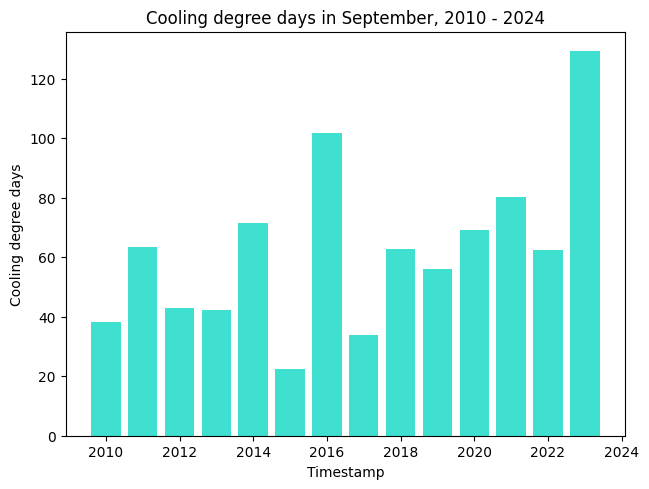

In [42]:
fig6

The above chart shows the amount of cooling degree days in the month of September each year.
For example, we see that 2015 was not a very warm september; it only had 20 cooling degree days.
Conversely, September 2023 had 130 cooling degree days, the hottest on record. 

There is a general upward trend in the number of cooling degree days in September each year. This implies that London's office buildings will be requiring more A/C to keep them at a good temperature in this month, which corresponds to higher demands for energy use.
This also indicates that September is getting hotter, so there is warm summer months for longer each year than previously.

#### **B. March Analysis**

Let's now look at the data from March each year. If winters are getting shorter and warmer over time, there should be fewer heating degree days in early spring, such as March.

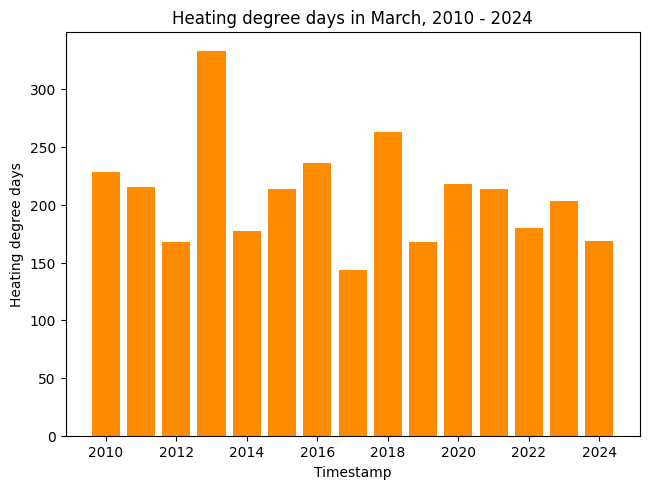

In [43]:
fig5

The above chart shows the amount of heating degree days in March each year. 
The coldest March was in 2013, when there were 335 heating degree days. This is hotter than some December months we have in this record.
The warmest March was in 2017, when there were only 145 heating degree days.  

There is a slight downward trend as predicted. This means that on average, there will be less requirement for heating in the winter as time goes on.

### **6. Conclusion**

The above graphs showed heating and cooling degree days for the past 14 years.

In yearly comparisons, there are slight trends in the amount of heating and cooling degree days registered.

In monthly comparisons, there were large trends, were there tended to be more cooling degree days and fewer heating degree days for the same month each year.

This implied a lengthening of London's summers, and the winters in London getting shorter.


**Limitations**

Although the above data is visually appealing, 14 years is not necessarily a suitable amount of time to look for long-term weather trends. We should find additional data, going back 20 or 30 years, before we draw the conclusion that summers are getting warmer each year. 

Further projects should cover the following:
<ol>
<li>Include further data, 20 or 30 years at least.</li>
<li>Include other London weather stations, for example Heathrow and Gatwick.</li>
<li>Compare sunshine hours with CDDs, to see if warmer weather means sunnier months also.</li>
</ol>


### **7. Closing remarks**

I hope you enjoyed reading this project. 

It aimed to be informative about measuring weather in London, and how an energy analyst might predict trends in seasonal energy consumption in the city for future years. It can also be read for some quick understanding about data analysis using Pandas and Matplotlib.


If you have any questions, or would like to collaborate, please feel free to reach out.

Best,
Joey 🚀